<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">

# Logistic Regression Project - Solutions

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [22]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [23]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Use info and describe() on ad_data**

In [24]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [25]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

In [26]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age');

**Create a jointplot showing Area Income versus Age.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


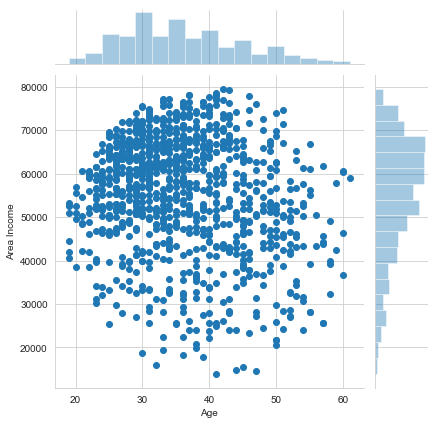

In [27]:
sns.jointplot(x='Age',y='Area Income',data=ad_data);

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


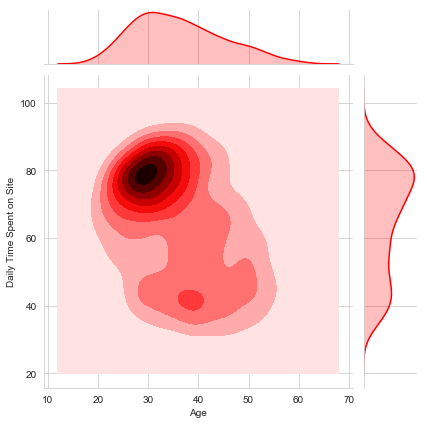

In [28]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


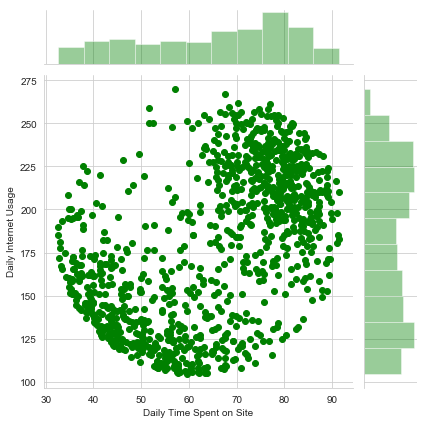

In [29]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green');

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


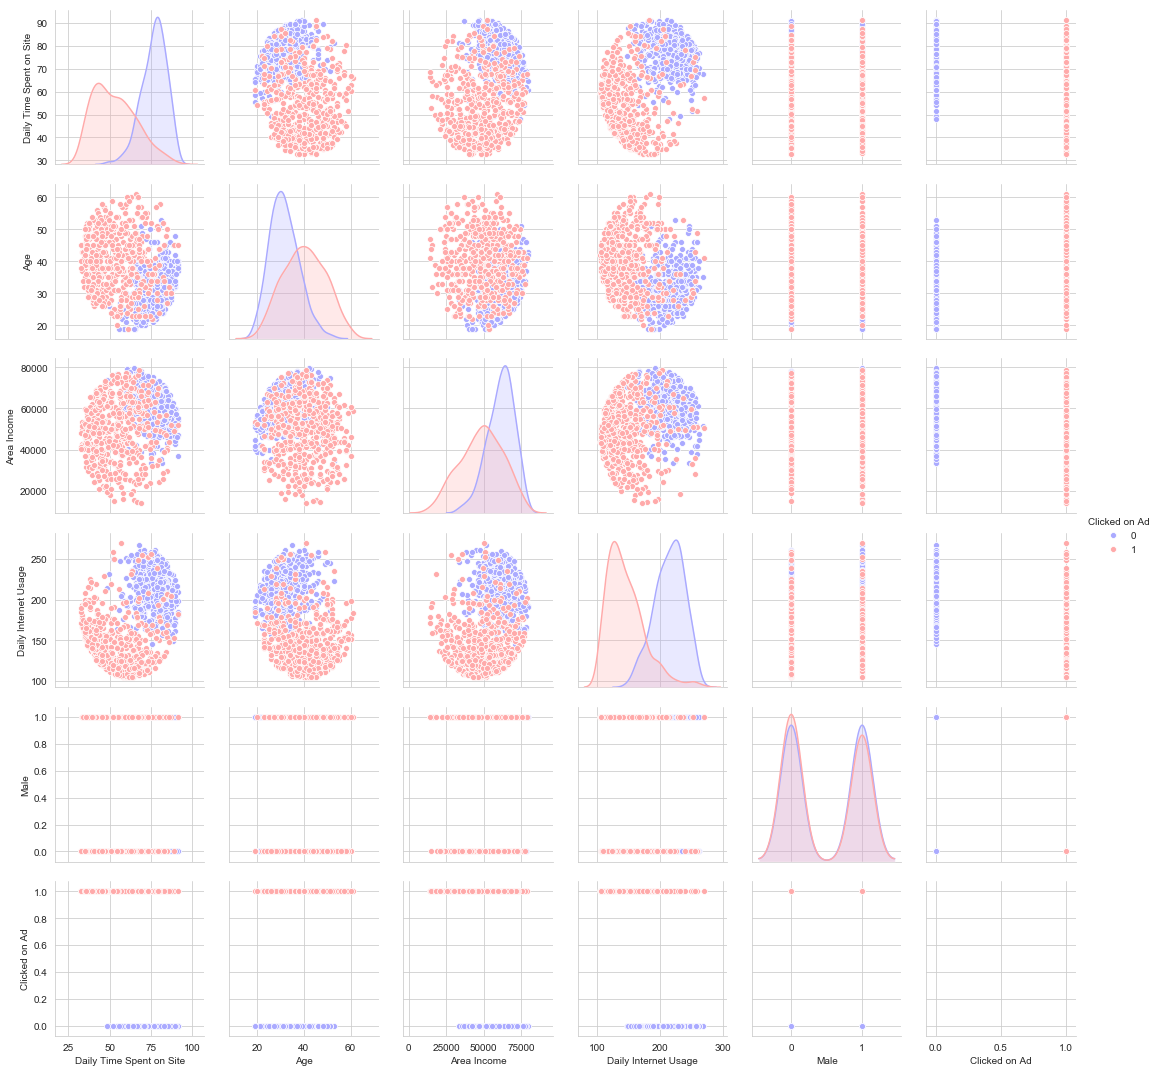

In [30]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr');

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [13]:
from sklearn.model_selection import train_test_split

In [31]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Please refer to:
> sklearn.linear_model.LogisticRegression

Please refer to:
>https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<b> Double click here for a detailed explanation of each parameter!</b>
<!-- 

penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)

dual : bool, optional (default=False)
Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

tol : float, optional (default=1e-4)
Tolerance for stopping criteria.

C : float, optional (default=1.0)
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

fit_intercept : bool, optional (default=True)
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

intercept_scaling : float, optional (default=1)
Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

class_weight : dict or ‘balanced’, optional (default=None)
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

New in version 0.17: class_weight=’balanced’

random_state : int, RandomState instance or None, optional (default=None)
The seed of the pseudo random number generator to use when shuffling the data. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Used when solver == ‘sag’ or ‘liblinear’.

solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not handle no penalty
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

New in version 0.17: Stochastic Average Gradient descent solver.

New in version 0.19: SAGA solver.

Changed in version 0.20: Default will change from ‘liblinear’ to ‘lbfgs’ in 0.22.

max_iter : int, optional (default=100)
Maximum number of iterations taken for the solvers to converge.

multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, optional (default=’ovr’)
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

New in version 0.18: Stochastic Average Gradient descent solver for ‘multinomial’ case.

Changed in version 0.20: Default will change from ‘ovr’ to ‘auto’ in 0.22.

verbose : int, optional (default=0)
For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

warm_start : bool, optional (default=False)
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.

New in version 0.17: warm_start to support lbfgs, newton-cg, sag, saga solvers.

n_jobs : int or None, optional (default=None)
Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

l1_ratio : float or None, optional (default=None)
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'`. Setting ``l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

-->

## Predictions and Evaluations
** Now predict values for the testing data.**

In [35]:
predictions = logmodel.predict(X_test)

** Create a classification report and a confusion matrix for the model.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



Please refer to:
> sklearn.metrics.classification_report

In [39]:
print(confusion_matrix(y_test,predictions))

[[156   6]
 [ 24 144]]


Please refer to:
> sklearn.metrics.confusion_matrix

In [42]:
# In the binary case, we can extract true positives, etc as follows:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print("TP: %d, TN: %d, FP: %d, FN: %d" % (tp, tn, fp, fn))

TP: 144, TN: 156, FP: 6, FN: 24


In [49]:
# we see that we can make a better use if we transpose our confusion matrix
cmt = confusion_matrix(y_test,predictions)
cmt.T

array([[156,  24],
       [  6, 144]], dtype=int64)

In [53]:
print('Actual 1s:', y_test.sum(), ', actual 0s:', y_test.shape[0]-y_test.sum(), ', total:', y_test.shape[0])

Actual 1s: 168 , actual 0s: 162 , total: 330


In [54]:
print('Predicted 1s:', tp, 'misclassified 1s:', fn)

Predicted 1s: 144 misclassified 1s: 24


In [55]:
print('Predicted 0s:', tn, 'misclassified 0s:', fp)

Predicted 0s: 156 misclassified 0s: 6


### Let us explain things a bit more

<img src = './Precision, Recall, Accuracy.jpg' alt = 'Precision, Recall, Accuracy'>

<img src = './F1_Score.jpg' alt = 'F1_Score'>

Precision - Accuracy of positive predictions<br>
Recall - Fraction of positives that were correctly identified

## Great Job!

<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">